In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
sys.path.append(os.getcwd() + '/core')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from visualize import plot_hist, AUROC
import config

# Setting_VAE_NLL

In [47]:
array_path = './npy/VAE_NLL'

model = 'VAE'
#opt = config.VAE_cifar10
opt = config.VAE_fmnist

normalize_factor = 1
if opt.train_dist == 'cifar10':
    min_x = 6000
    max_x = 15000
    multiplier = 1
elif opt.train_dist == 'fmnist':
    min_x = 0
    max_x = 5000
    multiplier = 1

# Setting_GLOW_NLL

In [92]:
array_path = './npy/GLOW_NLL'

model = 'GLOW'
#opt = config.GLOW_cifar10
opt = config.GLOW_fmnist

normalize_factor = 1 / 1024
if opt.train_dist == 'cifar10':
    min_x = 1
    max_x = 6
    multiplier = 3
elif opt.train_dist == 'fmnist':
    min_x = 0
    max_x = 5
    multiplier = 1

# Plot NLL Histogram & Save the figure

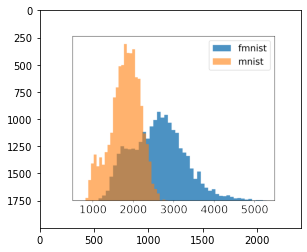

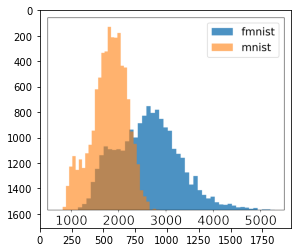

In [98]:
from PIL import Image
path = './images/histogram/selected_images/Histogram_fmnist_mnist_NLL_GLOw.png'
img = Image.open(path)
w = 180
h = 110
cropped_img = img.crop((w+60, h+70, 2400-w, 2000-h))

plt.figure()
plt.imshow(img)
plt.show()
plt.figure()
plt.imshow(cropped_img)
plt.show()

#img = cropped_img
#img.save(path)

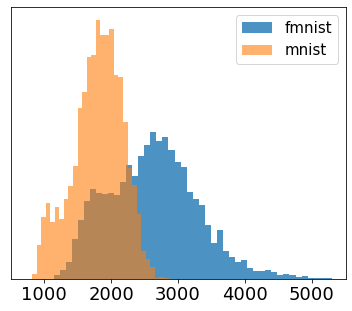

In [96]:
auroc = {}
in_nll = np.load(f'{array_path}/{opt.train_dist}_{opt.train_dist}_nll.npy' )
in_nll *= multiplier
for ood in ['mnist']:
    out_nll = np.load(f'{array_path}/{opt.train_dist}_{ood}_nll.npy')
    out_nll *= multiplier
    #if opt.train_dist == 'fmnist' and ood == 'mnist':
    #    out_nll[out_nll > 100] = 2
    try:
        auroc[ood] = AUROC(in_nll, out_nll, labels=[opt.train_dist, ood], verbose=False)
    except ValueError:
        out_nll[out_nll == np.inf] = 1e+30
        auroc[ood] = AUROC(in_nll, out_nll, labels=[opt.train_dist, ood], verbose=False)
    
    fig = plt.figure(figsize=(6, 5))
    ax = fig.add_subplot(111)
    ax.hist(in_nll / normalize_factor, bins=50, density=True, alpha=0.8, label=opt.train_dist)
    ax.hist(out_nll / normalize_factor, bins=30, density=True, alpha=0.6, label=ood)
    
    ax.set_xlim([500, 5500])
    ax.set_xticks(np.arange(0, 6000, 1000)[1:])
    ax.set_yticks([])
    ax.tick_params(axis='x', labelsize=18)
    
    plt.legend(prop={'size': 15})
    fig.savefig(f'./images/histogram/Histogram_{opt.train_dist}_{ood}_NLL_{model}.png', dpi=400)
    
    plt.show()
    
    
    

In [50]:
np.load(f'./npy/VAE_NLL/fmnist_fmnist_nll.npy')

array([3410.88085938, 1618.41247559, 2787.67260742, ..., 1485.55993652,
       2614.31567383, 3047.08032227])